<a href="https://colab.research.google.com/github/DwiBagiaSantosa/C23-PS117/blob/ml/notebooks/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle API and Importing libraries

In [1]:
!pip install kaggle -q
!pip install split-folders -q
!pip install python-resize-image -q

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwibagiasantosa","key":"ba55d5a6ca8411f3fa4188a32767070a"}'}

In [3]:
# Kaggle API Set Up

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
from resizeimage import resizeimage
import splitfolders
import random

# Import Datasets from Kaggle

**Dataset 1:**

https://www.kaggle.com/datasets/theresalusiana/indonesian-food

Classes that we collect from the dataset:
- Bakso
- Gado-gado
- Rendang
- Sate

**Dataset 2:**

https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

Classes that we collect from the dataset:
- Egg
- Soup

**Dataset 3:**

https://www.kaggle.com/datasets/kmader/food41

Classes that we collect from the dataset:
- Cheese Cake
- Chicken Wings
- Churros
- Donuts
- French Fries
- Fried Rice
- Hamburger
- Hot Dog
- Macaroni and Cheese
- Pancakes
- Pizza
- Spaghetti
- Sushi
- Takoyaki
- Waffles


In [ ]:
# Download dataset 1:
!kaggle datasets download -d theresalusiana/indonesian-food

# Download dataset 2:
!kaggle datasets download -d trolukovich/food11-image-dataset

# Download dataset 3:
!kaggle datasets download -d kmader/food41

 99% 667M/673M [00:08<00:00, 70.2MB/s]
100% 673M/673M [00:08<00:00, 81.3MB/s]
100% 1.08G/1.08G [00:05<00:00, 194MB/s]
100% 1.08G/1.08G [00:05<00:00, 204MB/s]
100% 5.28G/5.30G [00:45<00:00, 137MB/s]
100% 5.30G/5.30G [00:45<00:00, 126MB/s]


# Extract & Split the datasets

Each class obtained from each dataset has 1000 images. We split each class into 700 for Training set, 150 for Validation set, and 150 for Test set.

In [ ]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/dev
!mkdir dataset/test

## Dataset 1 - Extraction & Cleaning

Dataset is already split into train, dev, and test but needed to be cleaned up.

### Extract the training set

In [ ]:
!unzip -j -q indonesian-food.zip "dataset/train/bakso/*" -d "dataset/train/bakso"
!unzip -j -q indonesian-food.zip "dataset/train/gado/*" -d "dataset/train/gado"
!unzip -j -q indonesian-food.zip "dataset/train/rendang/*" -d "dataset/train/rendang"
!unzip -j -q indonesian-food.zip "dataset/train/sate/*" -d "dataset/train/sate"

### Extract the validation set

In [ ]:
!unzip -j -q indonesian-food.zip "dataset/valid/bakso/*" -d "dataset/dev/bakso"
!unzip -j -q indonesian-food.zip "dataset/valid/gado/*" -d "dataset/dev/gado"
!unzip -j -q indonesian-food.zip "dataset/valid/rendang/*" -d "dataset/dev/rendang"
!unzip -j -q indonesian-food.zip "dataset/valid/sate/*" -d "dataset/dev/sate"

### Extract the test set

In [ ]:
!unzip -j -q indonesian-food.zip "dataset/test/bakso/*" -d "dataset/test/bakso"
!unzip -j -q indonesian-food.zip "dataset/test/gado/*" -d "dataset/test/gado"
!unzip -j -q indonesian-food.zip "dataset/test/rendang/*" -d "dataset/test/rendang"
!unzip -j -q indonesian-food.zip "dataset/test/sate/*" -d "dataset/test/sate"

### Remove spacing file name in folder

In [ ]:
!for file in dataset/train/gado/*; do mv "$file" "${file// /_}"; done
!for file in dataset/dev/gado/*; do mv "$file" "${file// /_}"; done
!for file in dataset/test/gado/*; do mv "$file" "${file// /_}"; done

### Save the first 700 Images to the train set folder and delete the rest

In [ ]:
!ls -d dataset/train/bakso/* | tail -n +701 | xargs rm
!ls -d dataset/train/gado/* | tail -n +701 | xargs rm
!ls -d dataset/train/rendang/* | tail -n +701 | xargs rm
!ls -d dataset/train/sate/* | tail -n +701 | xargs rm

### Save the first 150 Images to the dev set folder and delete the rest

In [ ]:
!ls -d dataset/dev/bakso/* | tail -n +151 | xargs rm
!ls -d dataset/dev/gado/* | tail -n +151 | xargs rm
!ls -d dataset/dev/rendang/* | tail -n +151 | xargs rm
!ls -d dataset/dev/sate/* | tail -n +151 | xargs rm

### Save the first 150 Images to the test set folder and delete the rest

In [ ]:
!ls -d dataset/test/bakso/* | tail -n +151 | xargs rm
!ls -d dataset/test/gado/* | tail -n +151 | xargs rm
!ls -d dataset/test/rendang/* | tail -n +151 | xargs rm
!ls -d dataset/test/sate/* | tail -n +151 | xargs rm

### Check how many Images in the train folder for each classes

In [ ]:
!find dataset/train/bakso/ -type f | wc -l
!find dataset/train/gado/ -type f | wc -l
!find dataset/train/rendang/ -type f | wc -l
!find dataset/train/sate/ -type f | wc -l

700
700
700
700


### Check how many Images in the dev folder for each classes

In [ ]:
!find dataset/dev/bakso/ -type f | wc -l
!find dataset/dev/gado/ -type f | wc -l
!find dataset/dev/rendang/ -type f | wc -l
!find dataset/dev/sate/ -type f | wc -l

150
150
150
150


### Check how many Images in the test folder for each classes

In [ ]:
!find dataset/test/bakso/ -type f | wc -l
!find dataset/test/gado/ -type f | wc -l
!find dataset/test/rendang/ -type f | wc -l
!find dataset/test/sate/ -type f | wc -l

150
150
150
150


## Dataset 2 Extract and split the dataset

Dataset is already split into train, dev, and test but needed to be cleaned up.

### Extract the training set

In [ ]:
!unzip -j -q food11-image-dataset.zip "training/Egg/*" -d "dataset/train/egg"
!unzip -j -q food11-image-dataset.zip "training/Soup/*" -d "dataset/train/soup"

### Extract the validation set

In [ ]:
!unzip -j -q food11-image-dataset.zip "validation/Egg/*" -d "dataset/dev/egg"
!unzip -j -q food11-image-dataset.zip "validation/Soup/*" -d "dataset/dev/soup"

### Extract the test set

In [ ]:
!unzip -j -q food11-image-dataset.zip "evaluation/Egg/*" -d "dataset/test/egg"
!unzip -j -q food11-image-dataset.zip "evaluation/Soup/*" -d "dataset/test/soup"

### Save the first 700 Images to the train set folder and delete the rest

In [ ]:
!ls -d dataset/train/egg/* | tail -n +701 | xargs rm
!ls -d dataset/train/soup/* | tail -n +701 | xargs rm

### Save the first 150 Images to the dev set folder and delete the rest

In [ ]:
!ls -d dataset/dev/egg/* | tail -n +151 | xargs rm
!ls -d dataset/dev/soup/* | tail -n +151 | xargs rm

### Save the first 150 Image to the test set folder and delete the rest

In [ ]:
!ls -d dataset/test/egg/* | tail -n +151 | xargs rm
!ls -d dataset/test/soup/* | tail -n +151 | xargs rm

### Check how many Images in the train folder for each classes

In [ ]:
!find dataset/train/egg/ -type f | wc -l
!find dataset/train/soup/ -type f | wc -l

700
700


### Check how many Images in the dev folder for each classes

In [ ]:
!find dataset/dev/egg/ -type f | wc -l
!find dataset/dev/soup/ -type f | wc -l

150
150


### Check how many Images in the test folder for each classes

In [ ]:
!find dataset/test/egg/ -type f | wc -l
!find dataset/test/soup/ -type f | wc -l

150
150


## Dataset 3 Extract and split the dataset

The data set need to be split manually

In [ ]:
# make a temporary data

!mkdir dirty_data

### Extract the classes

In [ ]:
!unzip -j -q food41.zip "images/cheesecake/*" -d "dirty_data/cheesecake"
!unzip -j -q food41.zip "images/chicken_wings/*" -d "dirty_data/chicken_wings"
!unzip -j -q food41.zip "images/churros/*" -d "dirty_data/churros"
!unzip -j -q food41.zip "images/donuts/*" -d "dirty_data/donuts"
!unzip -j -q food41.zip "images/french_fries/*" -d "dirty_data/french_fries"
!unzip -j -q food41.zip "images/fried_rice/*" -d "dirty_data/fried_rice"
!unzip -j -q food41.zip "images/hamburger/*" -d "dirty_data/hamburger"
!unzip -j -q food41.zip "images/hot_dog/*" -d "dirty_data/hot_dog"
!unzip -j -q food41.zip "images/macaroni_and_cheese/*" -d "dirty_data/mac_and_cheese"
!unzip -j -q food41.zip "images/pancakes/*" -d "dirty_data/pancakes"
!unzip -j -q food41.zip "images/pizza/*" -d "dirty_data/pizza"
!unzip -j -q food41.zip "images/spaghetti_bolognese/*" -d "dirty_data/spaghetti"
!unzip -j -q food41.zip "images/sushi/*" -d "dirty_data/sushi"
!unzip -j -q food41.zip "images/takoyaki/*" -d "dirty_data/takoyaki"
!unzip -j -q food41.zip "images/waffles/*" -d "dirty_data/waffles"

In [ ]:
# Splitting data into 150 each for dev and test. The remainder will be training set

splitfolders.fixed("dirty_data", output="temp_folder", seed=42, fixed=(150, 150))

Copying files: 15000 files [00:08, 1699.55 files/s]


In [ ]:
# Cleaning up the temporary folders

!mv temp_folder/train/* dataset/train/
!mv temp_folder/val/* dataset/dev/
!mv temp_folder/test/* dataset/test/
!rm -rf temp_folder
!rm -rf dirty_data

### Function to show random Images

In [ ]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

### Resizing Images into 224 X 224 Pixels

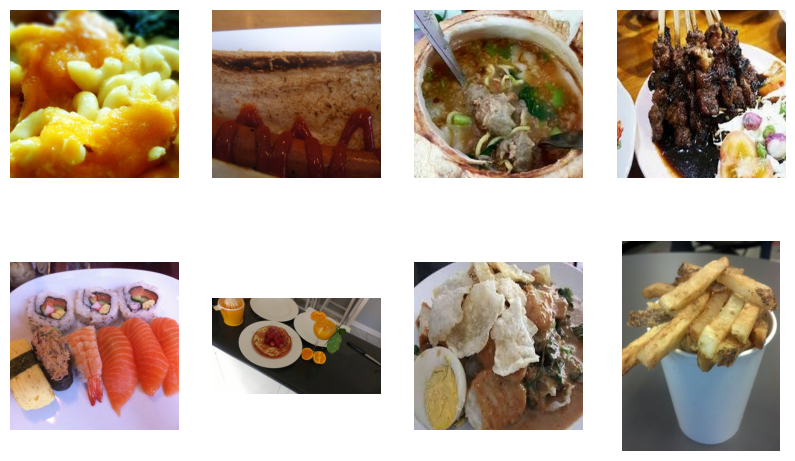

In [ ]:
# Before Resize

show_random_images_from("dataset/*/*/*", seed=380)

In [ ]:
for i, img in enumerate(glob("dataset/*/*/*")):
    try:
      image = Image.open(img)
      cover = resizeimage.resize_cover(image, [224, 224])
      cover.save(img)
    except:
      print(img, " ----- error converting, skipped.")

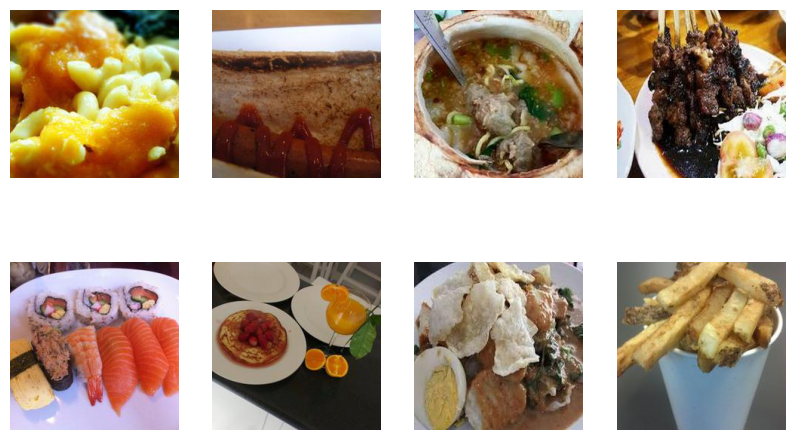

In [ ]:
# After Resize

show_random_images_from("dataset/*/*/*", seed=380)

# Save the cleaned dataset to gdrive

In [ ]:
# Zip the dataset folder

!zip -r -q cleaned_dataset_v2.zip "/content/dataset/"

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Copy the cleaned dataset to gdrive

!cp -r "cleaned_dataset_v2.zip" "drive/MyDrive/C23-PS117 Bangkit Capstone Project Team/Dataset/"

In [ ]:
# Check the saved dataset

!ls "drive/MyDrive/C23-PS117 Bangkit Capstone Project Team/Dataset/"

cleaned_dataset_v2.zip	cleaned_dataset.zip


In [ ]:
# Flush data and unmount

drive.flush_and_unmount()